## 時系列データを集計し、祝日などの情報を追加する

In [1]:
# Google　Colaboratory で実行する場合はインストールする
if "google.colab" in str(get_ipython()):
    !pip install japanize_matplotlib

In [2]:
import japanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
import os

np.random.seed(777)
if os.path.exists("../../stylesheet/k_dm.mplstyle"):
    plt.style.use("../../stylesheet/k_dm.mplstyle")

## サンプルデータ
[Genco Shipping & Trading Limited (GNK)](https://finance.yahoo.com/quote/GNK?p=GNK)のデータを使用します。

[pandas.DataFrame.set_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html)

In [4]:
data = pd.read_csv("GNK.csv")
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-08,10.50,11.660,9.780,10.38,9.072854,462600
2017-05-15,10.45,10.680,9.580,10.64,9.300114,493200
2017-05-22,10.74,10.740,9.540,10.32,9.020411,391000
2017-05-29,10.05,10.072,9.110,9.64,8.426042,345200
2017-06-05,9.64,10.990,9.320,10.06,8.793151,385700
2017-06-12,10.12,10.770,9.200,9.41,8.225004,461400
2017-06-19,9.50,9.500,8.470,9.28,8.111376,1437400
2017-06-26,9.46,9.960,8.895,9.47,8.277452,446000
2017-07-03,9.50,9.770,8.880,9.06,7.919081,311000


## 集計する・集計したものをプロットする

- [pandas.DataFrame.resample — pandas 1.4.2 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)
- [pandas.DataFrame.rolling — pandas 1.4.2 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)
- [pandas.DataFrame.interpolate](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html#pandas-dataframe-interpolate)
- [pandas.DataFrame.shift](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html)

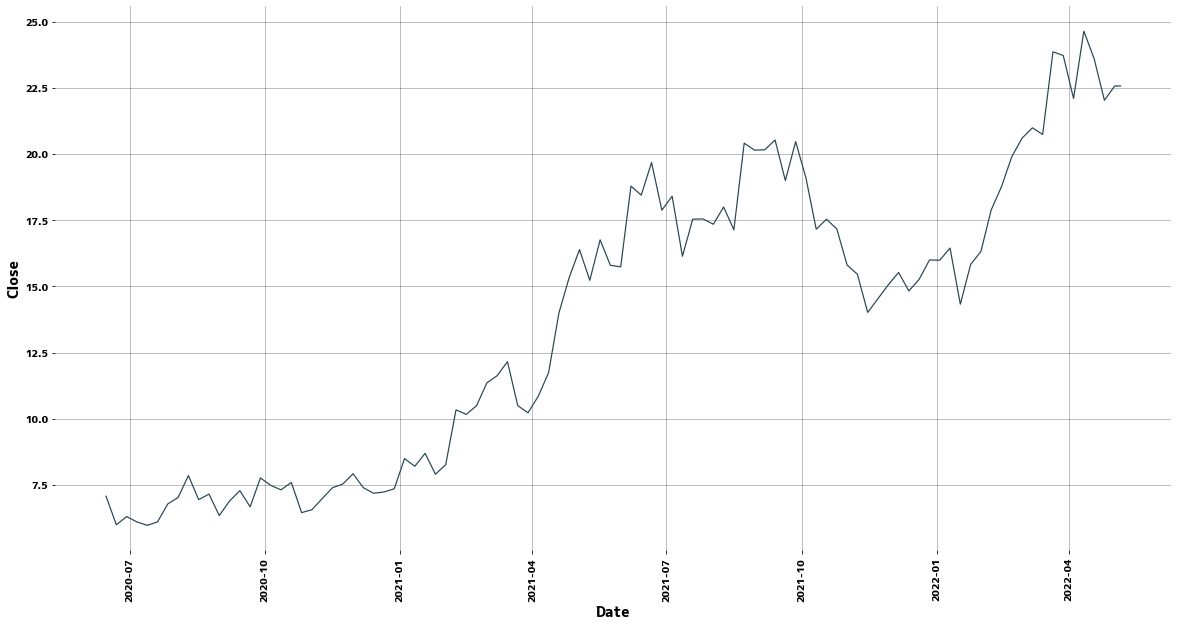

In [5]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=data.tail(100), x="Date", y="Close")
plt.xticks(rotation=90)
plt.grid()
plt.show()

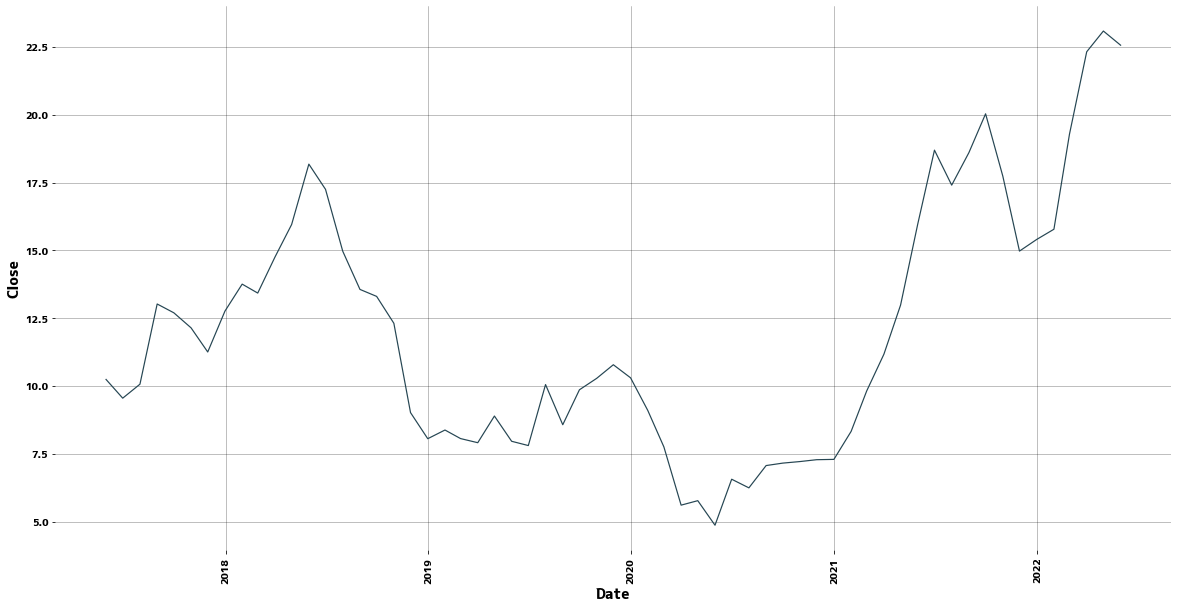

In [6]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=data.resample("1M").mean(), x="Date", y="Close")
plt.xticks(rotation=90)
plt.grid()
plt.show()

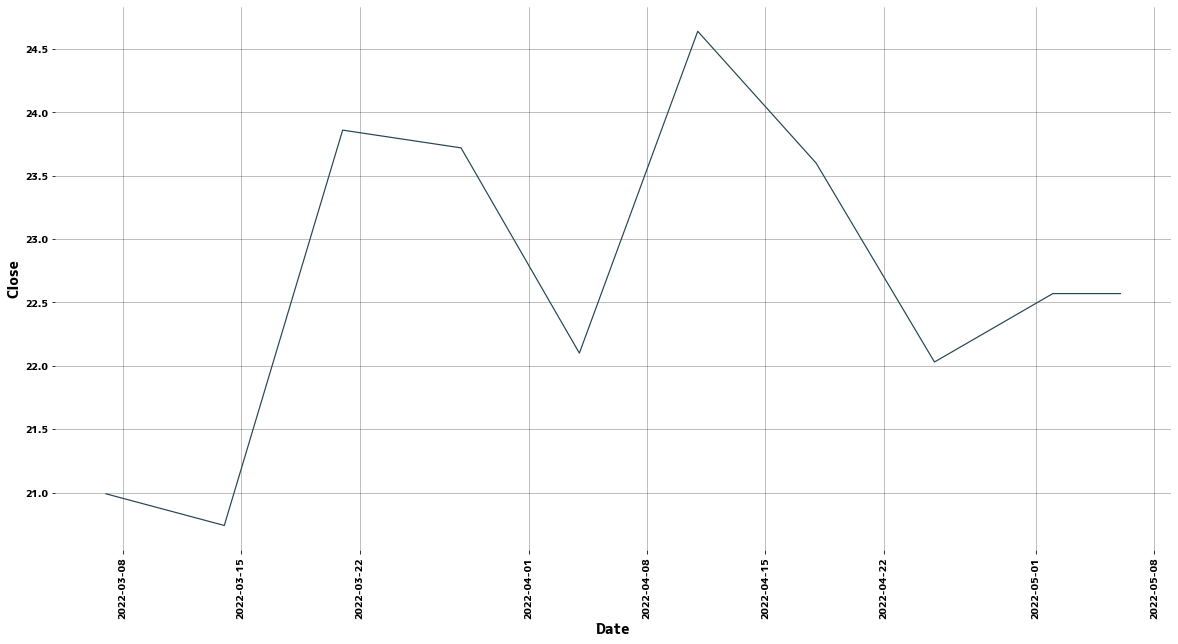

In [9]:
plt.figure(figsize=(20, 10))
# sns.lineplot(data=data.tail(10).resample("1D").mean().fillna(0), x="Date", y="Close")
sns.lineplot(
    data=data.tail(10).resample("1D").mean().interpolate().fillna(0),
    x="Date",
    y="Close",
)
plt.xticks(rotation=90)
plt.grid()
plt.show()

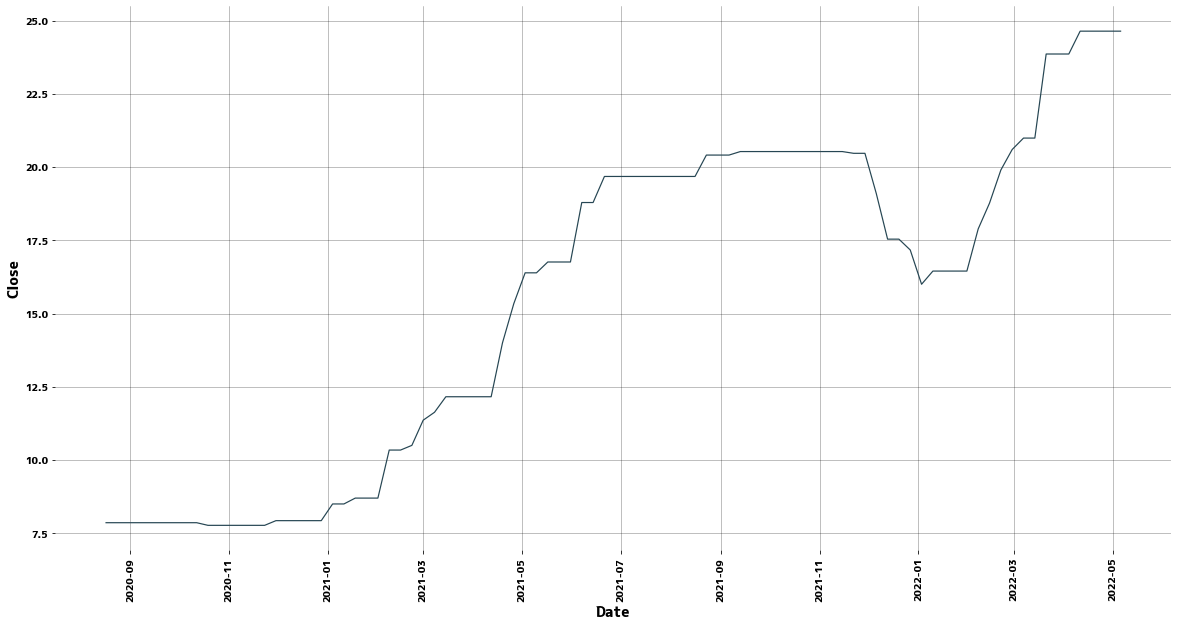

In [12]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=data.tail(100).rolling(10).max(), x="Date", y="Close")
plt.xticks(rotation=90)
plt.grid()
plt.show()

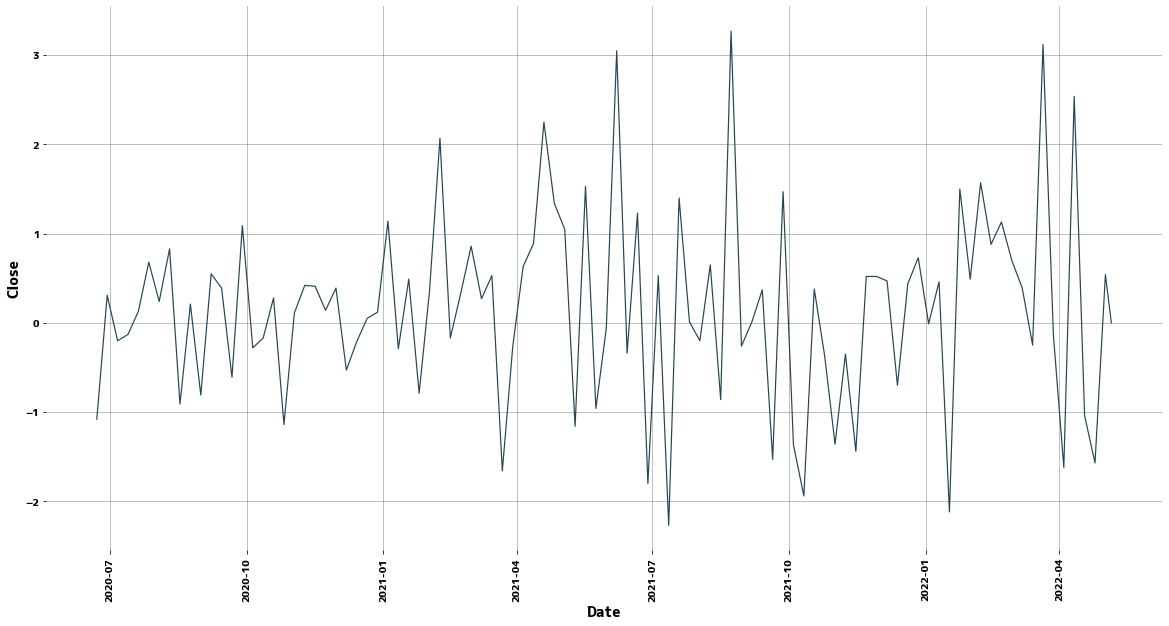

In [17]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=data.tail(100).diff(1), x="Date", y="Close")
plt.xticks(rotation=90)
plt.grid()
plt.show()

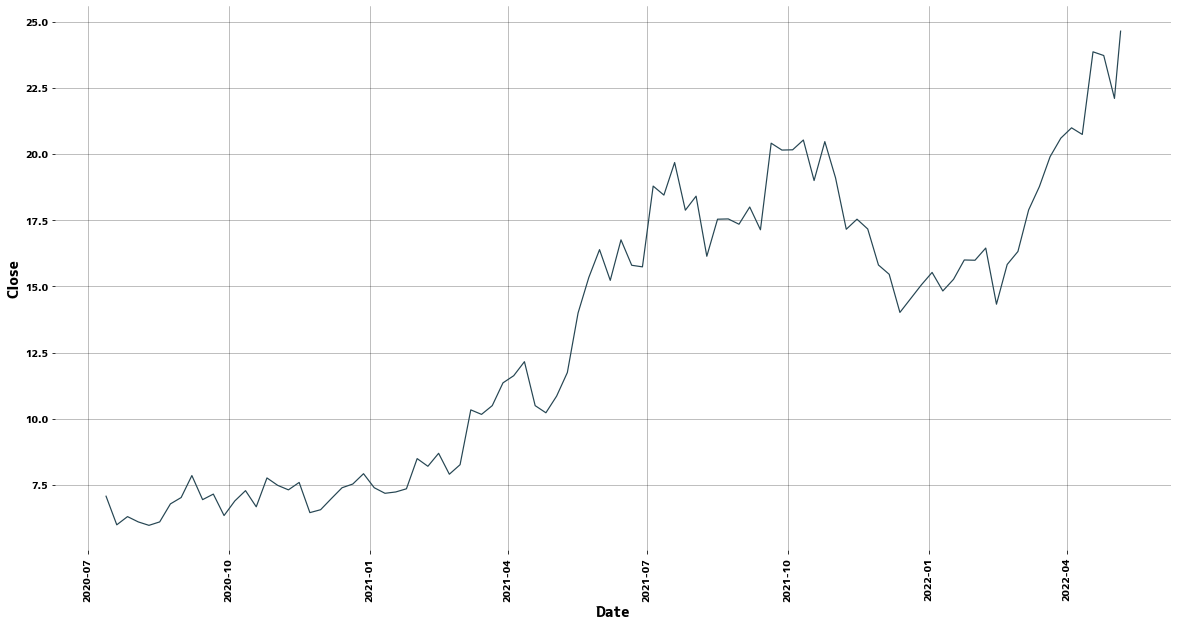

In [18]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=data.tail(100).shift(4), x="Date", y="Close")
plt.xticks(rotation=90)
plt.grid()
plt.show()

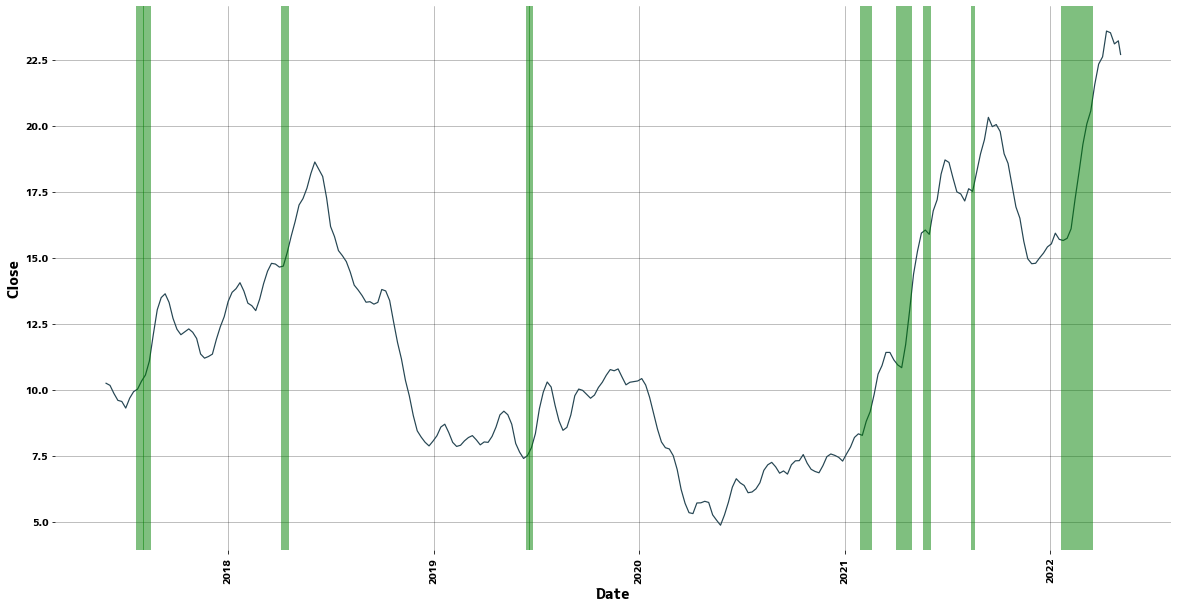

In [19]:
mean_avarage_data = data.rolling(4).mean()
cond = (mean_avarage_data.shift(-4) - mean_avarage_data) > 2
is_uptrend = cond["Close"]

plt.figure(figsize=(20, 10))
sns.lineplot(data=mean_avarage_data, x="Date", y="Close")
plt.xticks(rotation=90)
plt.grid()

for ind, is_up in zip(is_uptrend.index, is_uptrend):
    if is_up:
        plt.axvline(x=ind, color="g", alpha=0.5, linewidth=4)

plt.show()

In [12]:
dividend_data = pd.read_csv("GNK-dividend.csv")
dividend_data["Date"] = pd.to_datetime(dividend_data["Date"])
dividend_data.set_index("Date", inplace=True)
dividend_data.head(10)

,Dividends
Date,
2019-11-20,0.500
2020-03-05,0.175
2020-05-15,0.020
2020-08-14,0.020
2020-11-16,0.020
2021-03-09,0.020
2021-05-14,0.050
2021-08-16,0.100
2021-11-12,0.150


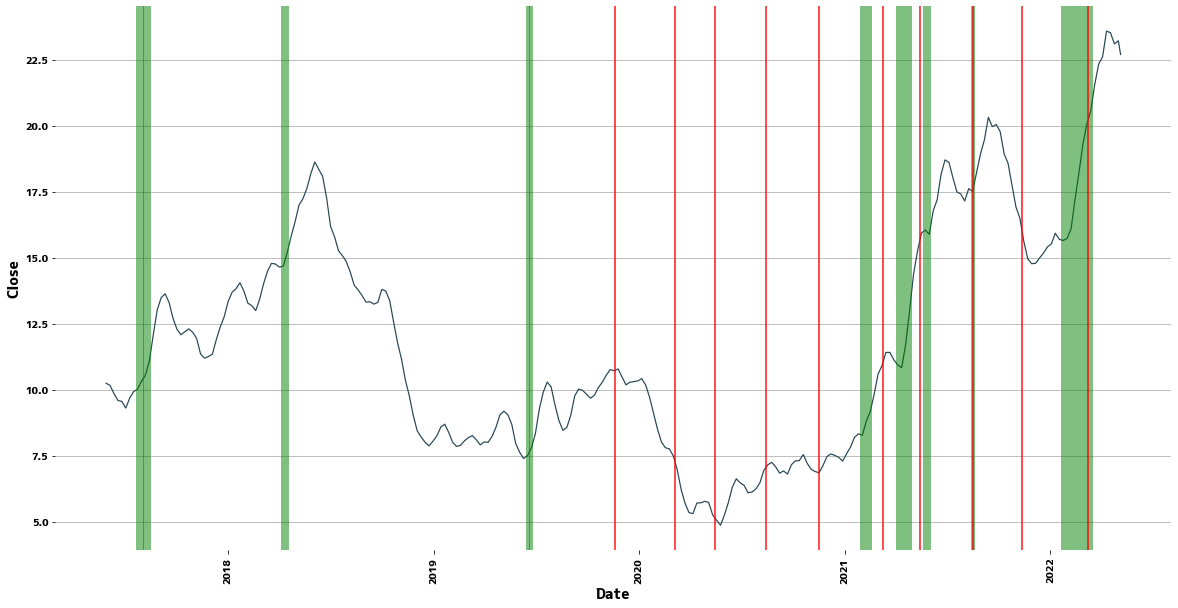

In [13]:
mean_avarage_data = data.rolling(4).mean()
cond = (mean_avarage_data.shift(-4) - mean_avarage_data) > 2
is_uptrend = cond["Close"]

plt.figure(figsize=(20, 10))
sns.lineplot(data=mean_avarage_data, x="Date", y="Close")
plt.xticks(rotation=90)
plt.grid(axis="y")

for ind, is_up in zip(is_uptrend.index, is_uptrend):
    if is_up:
        plt.axvline(x=ind, color="g", alpha=0.5, linewidth=4)

for ind, value in dividend_data.iterrows():
    plt.axvline(x=ind, color="r", alpha=0.7, linewidth=2)


plt.show()

## GroupBy
[pandas.Grouper](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html)

In [20]:
data = pd.read_csv("GNK.csv")
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index(data["Date"])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2017-05-08,2017-05-08,10.50,11.660,9.78,10.38,9.072854,462600
2017-05-15,2017-05-15,10.45,10.680,9.58,10.64,9.300114,493200
2017-05-22,2017-05-22,10.74,10.740,9.54,10.32,9.020411,391000
2017-05-29,2017-05-29,10.05,10.072,9.11,9.64,8.426042,345200
2017-06-05,2017-06-05,9.64,10.990,9.32,10.06,8.793151,385700


In [15]:
data.groupby(pd.Grouper(key="Date", freq="1M")).mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-31,10.435000,10.78800,9.502500,10.2450,8.954855,423000.0
2017-06-30,9.680000,10.30500,8.971250,9.5550,8.351746,682625.0
2017-07-31,9.912000,10.78400,9.460200,10.0700,8.801892,347480.0
2017-08-31,12.352500,13.46075,11.814500,13.0275,11.386956,466900.0
2017-09-30,13.320000,13.66750,12.432500,12.7025,11.102882,263500.0
...,...,...,...,...,...,...
2022-01-31,15.712000,16.60000,14.764000,15.7840,15.289366,2800380.0
2022-02-28,18.108750,20.11750,17.418751,19.2900,18.685496,5015700.0
2022-03-31,21.530000,22.75075,20.192500,22.3275,22.163055,6002975.0


### プロパティを取得する
ここでは`pandas.Series.dt`を使用してみます。

> Accessor object for datetimelike properties of the Series values. [pandas.Series.dt](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html)

[pandas.Series.dt.dayofweek](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html)を試してみます。

In [16]:
data["週番号"] = data["Date"].dt.dayofyear
data["週番号"].tail()

Date
2022-04-11    101
2022-04-18    108
2022-04-25    115
2022-05-02    122
2022-05-06    126
Name: 週番号, dtype: int64

In [17]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,週番号
Date,,,,,,,,
2017-05-08,2017-05-08,10.50,11.660,9.780,10.38,9.072854,462600,128
2017-05-15,2017-05-15,10.45,10.680,9.580,10.64,9.300114,493200,135
2017-05-22,2017-05-22,10.74,10.740,9.540,10.32,9.020411,391000,142
2017-05-29,2017-05-29,10.05,10.072,9.110,9.64,8.426042,345200,149
2017-06-05,2017-06-05,9.64,10.990,9.320,10.06,8.793151,385700,156
2017-06-12,2017-06-12,10.12,10.770,9.200,9.41,8.225004,461400,163
2017-06-19,2017-06-19,9.50,9.500,8.470,9.28,8.111376,1437400,170
2017-06-26,2017-06-26,9.46,9.960,8.895,9.47,8.277452,446000,177
2017-07-03,2017-07-03,9.50,9.770,8.880,9.06,7.919081,311000,184


In [18]:
data.groupby(pd.Grouper(key="Date", freq="1M")).mean()

,Open,High,Low,Close,Adj Close,Volume,週番号
Date,,,,,,,
2017-05-31,10.435000,10.78800,9.502500,10.2450,8.954855,423000.0,138.5
2017-06-30,9.680000,10.30500,8.971250,9.5550,8.351746,682625.0,166.5
2017-07-31,9.912000,10.78400,9.460200,10.0700,8.801892,347480.0,198.0
2017-08-31,12.352500,13.46075,11.814500,13.0275,11.386956,466900.0,229.5
2017-09-30,13.320000,13.66750,12.432500,12.7025,11.102882,263500.0,257.5
...,...,...,...,...,...,...,...
2022-01-31,15.712000,16.60000,14.764000,15.7840,15.289366,2800380.0,17.0
2022-02-28,18.108750,20.11750,17.418751,19.2900,18.685496,5015700.0,48.5
2022-03-31,21.530000,22.75075,20.192500,22.3275,22.163055,6002975.0,76.5


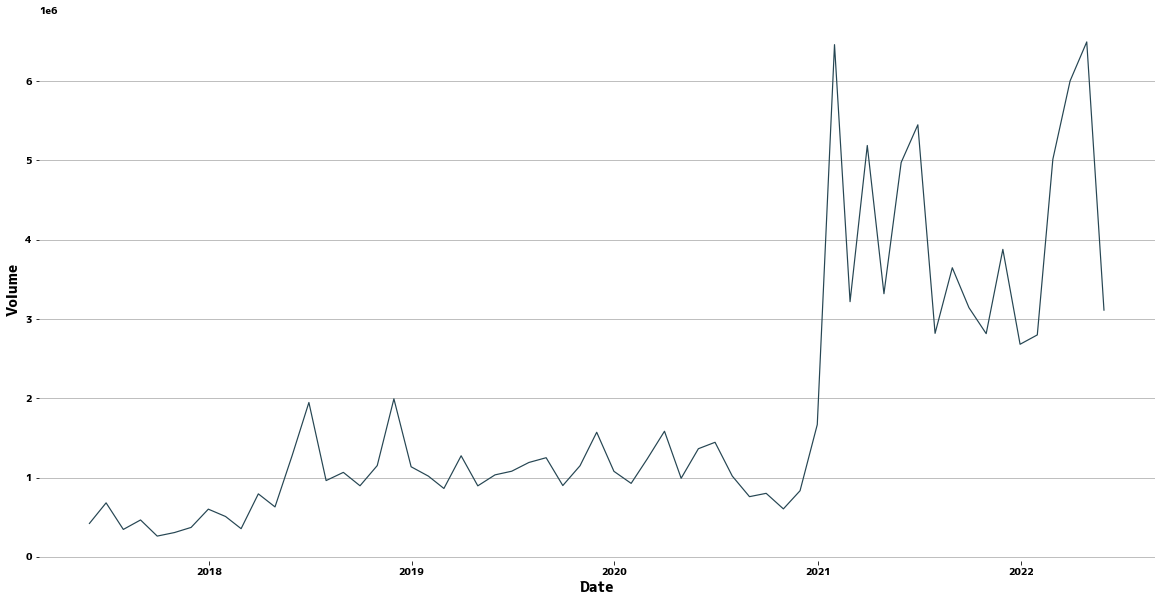

In [19]:
one_month_data = data.groupby(pd.Grouper(key="Date", freq="1M")).mean()

plt.figure(figsize=(20, 10))
sns.lineplot(data=one_month_data, x="Date", y="Volume")
plt.grid(axis="y")

## 祝日情報を利用する
[内閣府ホーム  >  内閣府の政策  >  制度  >  国民の祝日について](https://www8.cao.go.jp/chosei/shukujitsu/gaiyou.html)に用意されているcsvファイルを用いて祝日カレンダー情報を用意します。
`syukujitsu.csv` をインポートします。

In [21]:
holidays = pd.read_csv(
    "syukujitsu.csv",
    encoding="cp932",
    parse_dates=[0],
)["国民の祝日・休日月日"]

holidays.head()

0   1955-01-01
1   1955-01-15
2   1955-03-21
3   1955-04-29
4   1955-05-03
Name: 国民の祝日・休日月日, dtype: datetime64[ns]

### 祝日を除いた日付の一覧を取得する

- [pandas.date_range — pandas 1.4.2 documentation](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)
- [pandas.tseries.offsets.CustomBusinessDay  — pandas 1.4.2 documentation](https://pandas.pydata.org/docs/reference/api/pandas.tseries.offsets.CustomBusinessDay.html)
- [pandas.tseries.offsets.DateOffset](https://pandas.pydata.org/docs/reference/offset_frequency.html)

In [22]:
from pandas.tseries.offsets import CustomBusinessDay

custom_bd = pd.offsets.CustomBusinessDay(holidays=holidays)
pd.date_range("2022-04-01", "2022-05-20", freq=custom_bd)

DatetimeIndex(['2022-04-01', '2022-04-04', '2022-04-05', '2022-04-06',
               '2022-04-07', '2022-04-08', '2022-04-11', '2022-04-12',
               '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-18',
               '2022-04-19', '2022-04-20', '2022-04-21', '2022-04-22',
               '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28',
               '2022-05-02', '2022-05-06', '2022-05-09', '2022-05-10',
               '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-16',
               '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', freq='C')